In [1]:
import numpy  as np
import pandas as pd
import pathlib
#import PyNAFF as pnf
#import math   as mt
import re
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 18})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# Import the class
sys.path.insert(0, '../../detuning_analysis/detuning_prediction/')
from class_case_Detuning_Theoric    import case_Detuning_Theoric as cModel

#sys.path.insert(0, '/local/home/tpugnat/Documents/CEA/SixTrack/These_Workplace/CERN/Python/bpm_analysis/')
from BetaBeating_Analysis_Outils    import *

Analyse of Amplitude Detuning and Amplitude Beta-Beating
---
---

Because of nonlinearities of the magnetic field, variation of the tune and betatronic function can be observed (cf. the folder Theory). This script has has been design in order to analyse the Amplitude Detuning and the Amplitude Beta-Beating.

The Input Files used here are generated by BetaBeat.src, a CERN code analysing turn-by-turn beam position (https://github.com/pylhc/Beta-Beat.src)


- Definition of the parameter and load input files:


In [2]:
# General parameter
flg_save=True         # Set true to save the plots
pth_save="./Photo/"   # Path in which to save


# Check saveplace exist
if flg_save and (not os.path.exists(pth_save)):
    os.makedirs(pth_save)

In [3]:
# Path to the data
drt_datas="./Input_BB_Analysis/"  # Directory with the Datas to analyse (Output BetaBeat.src)
axis_data="X"                     # Axis of the action increasing

# Reference Tune
Qx=.31
Qy=.32

# Load Input Files
C1    =Get_MD_Data(name="nob 16-06-2018",#"B1 Corrected 16-06-2018",
                     axe=axis_data,
                     Path_Data=drt_datas+"2018-09-04/LHCB1/Results/",
                     Path_Modl=drt_datas+"2018-09-04/models/LHCB1/b1_squeeze_collQ/")




list_Case = [C1, C1]
n_Case    = len(list_Case)

WARNING [class case,load_File] twiss_elements.dat -> File not found (Error):
./Input_BB_Analysis/2018-09-04/models/LHCB1/b1_squeeze_collQ/nothing.dat


- Analysis of the Amplitude Detuning

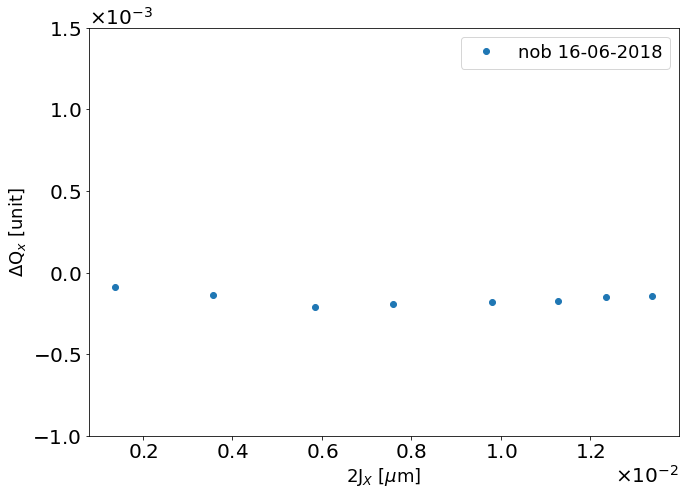

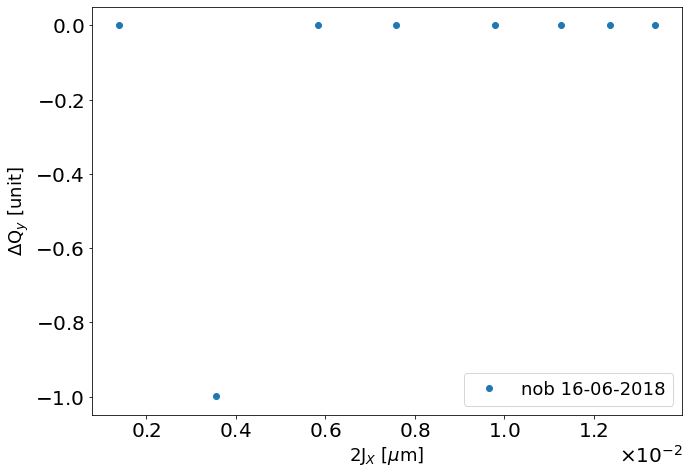

In [4]:
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(10, 7))

for l in list_Case:
    plot_data_vs_2J(ax,l["QX(2J"+axis_data+")"]-Qx,label=l["NAME"],ls="o")
ax.legend();
ax.set_ylim(-.001,.0015);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"$\Delta$Q$_x$ [unit]");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.93, bottom=.12)
if flg_save:
    fig.savefig(pth_save+'AmplitudeDetuningX_2J'+axis_data+'.pdf')
plt.show()


fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(10, 7))

for l in list_Case:
    plot_data_vs_2J(ax,l["QY(2J"+axis_data+")"]-Qy,label=l["NAME"],ls="o")
ax.legend();
#ax.set_ylim(-.002,.002);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"$\Delta$Q$_y$ [unit]");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.93, bottom=.12)
if flg_save:
    fig.savefig(pth_save+'AmplitudeDetuningY_2J'+axis_data+'.pdf')
plt.show()

- Analysis of the Amplitude Beta-Beating (from Spectale Line Amplitude):

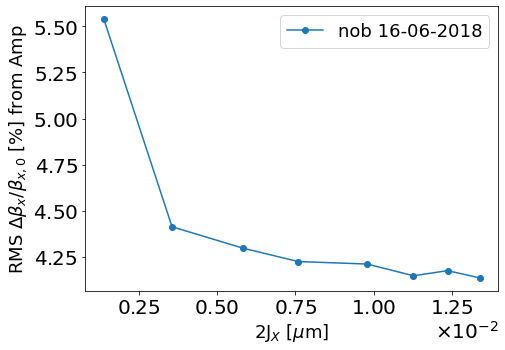

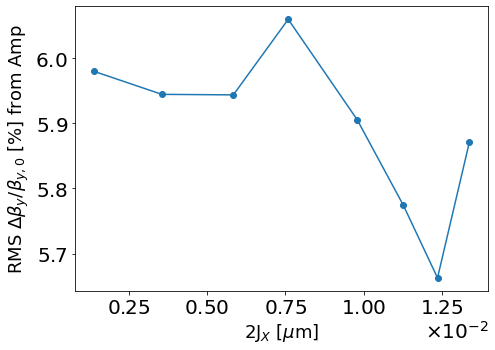

In [5]:
#  ABB in the Horizontal plan
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(7, 5))


for l in list_Case:
    plot_data_vs_2J(ax,pd.DataFrame(l["ABETX(2J"+axis_data+")"].std()).T   ,label=l["NAME"],ls="o-")
ax.legend();
#ax.set_ylim(-.002,.002);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"RMS $\Delta\beta_x/\beta_{x,0}$ [%] from Amp");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.95, bottom=.16)

if flg_save:
    fig.savefig(pth_save+'RMS-AmplitudeBetaBeating(AMP)X_2J'+axis_data+'.pdf')
plt.show()




#  ABB in the Vertical plan
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(7, 5))


for l in list_Case:
    plot_data_vs_2J(ax,pd.DataFrame(l["ABETY(2J"+axis_data+")"].std()).T   ,label=l["NAME"],ls="o-")
#ax.legend();
#ax.set_ylim(-.002,.002);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"RMS $\Delta\beta_y/\beta_{y,0}$ [%] from Amp");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.95, bottom=.16)

if flg_save:
    fig.savefig(pth_save+'RMS-AmplitudeBetaBeating(AMP)Y_2J'+axis_data+'.pdf')
plt.show()

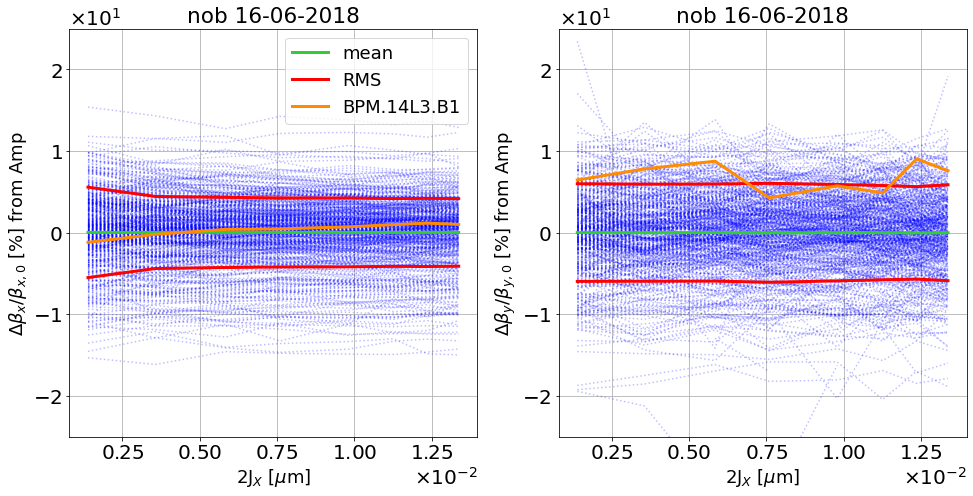

In [6]:
#name_BPM=''              # don't show particular BPM
name_BPM='BPM.14L3.B1'   # add Betabeating line in orange for this BPM
for n in range(n_Case):
    l=list_Case[n]
    fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(14, 7))


    plot_stat_vs_2J(ax[0],l["ABETX(2J"+axis_data+")"],alpha_D=.25)
    ax[0].legend();
    ax[0].grid();
    ax[0].set_ylim(-25,25);
    ax[0].set_xlabel(r"2J$_"+axis_data+"$ [$\mu$m]");
    ax[0].set_ylabel(r"$\Delta\beta_x$/$\beta_{x,0}$ [%] from Amp");
    ax[0].set_title(l["NAME"]);
    ax[0].ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)


    plot_stat_vs_2J(ax[1],l["ABETY(2J"+axis_data+")"],alpha_D=.25)
    #ax[1].legend();
    ax[1].grid();
    ax[1].set_ylim(-25,25);
    ax[1].set_xlabel(r"2J$_"+axis_data+"$ [$\mu$m]");
    ax[1].set_ylabel(r"$\Delta\beta_y$/$\beta_{y,0}$ [%] from Amp");
    ax[1].set_title(l["NAME"]);
    ax[1].ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

    if name_BPM:
        col = l["ABETX(2J"+axis_data+")"].columns.tolist(); col.sort()
        Data=pd.DataFrame(l["ABETX(2J"+axis_data+")"].loc[name_BPM,:]).T;  #print(Data)
        tp=pd.DataFrame(columns=col)
        for c in col:
            tp[c]=Data[c]
        for t in tp.iterrows():
            tmp=pd.DataFrame(t[1])
            #print(tmp)
            ax[0].plot(tmp.index.tolist(),tmp[tmp.columns.values].values,'-',color='darkorange',label=tmp.columns.values[0], linewidth=3)
            ax[0].legend()


        Data=pd.DataFrame(l["ABETY(2J"+axis_data+")"].loc[name_BPM,:]).T;  #print(Data)
        col = Data.columns.tolist(); col.sort()
        tp=pd.DataFrame(columns=col)
        for c in col:
            tp[c]=Data[c]
        for t in tp.iterrows():
            tmp=pd.DataFrame(t[1])
            #print(tmp)
            ax[1].plot(tmp.index.tolist(),tmp[tmp.columns.values].values,'-',color='darkorange',label=tmp.columns.values[0], linewidth=3)


    
    fig, plt.subplots_adjust(left=.08, right=.97, top=.93, bottom=.12)


    if flg_save:
        if name_BPM:
            fig.savefig(pth_save+f'Projection_BetaBeating(AMP)_vs_2J'+axis_data+f'-c{n}-bpm{name_BPM}.pdf')
        else:
            fig.savefig(pth_save+f'Projection_BetaBeating(AMP)_vs_2J'+axis_data+f'-c{n}.pdf')
    plt.show()

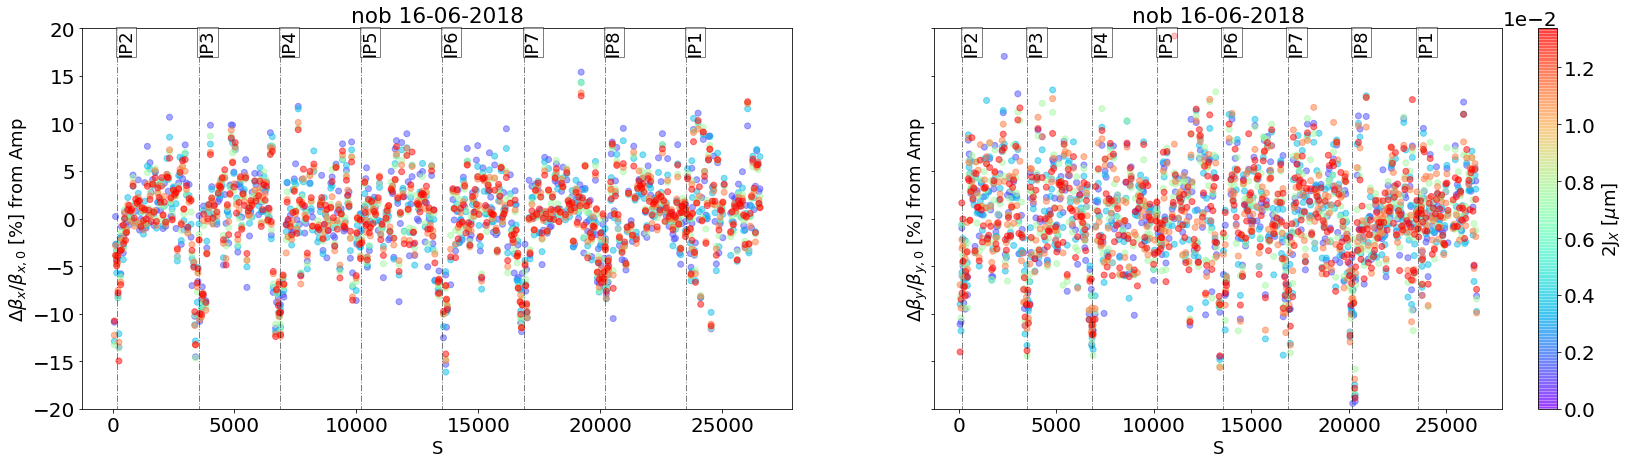

In [7]:
vylim=[-20,20]
cm = plt.cm.get_cmap('rainbow')  # RdYlBu, ocean, winter,  viridis, inferno, magma
n2J=5                           # Number of point in amplitude (0:all)
mmin2J=0                        # 0: none, 1: minus Initial beta-beating, 2: minus finale beta-beating



for n in range(n_Case):
    l=list_Case[n]
    
    fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(28, 7), sharex=True, sharey=True)

    sc=plot_data_vs_Sand2J(ax[0],l["ABETX(2J"+axis_data+")"],l["S"],l["struct"],ylim=vylim,ls='o',alpha=.5,cm=cm,n2J=n2J,mmin2J=mmin2J)
    #ax[0].legend();
    ax[0].set_ylim(vylim[0],vylim[1]);
    ax[0].set_xlabel(r"S");
    ax[0].set_ylabel(r"$\Delta\beta_x$/$\beta_{x,0}$ [%] from Amp");
    ax[0].set_title(l["NAME"]);


    sc=plot_data_vs_Sand2J(ax[1],l["ABETY(2J"+axis_data+")"],l["S"],l["struct"],ylim=vylim,ls='o',alpha=.5,cm=cm,n2J=n2J,mmin2J=mmin2J)
    #ax[1].legend();
    ax[1].set_ylim(vylim[0],vylim[1]);
    ax[1].set_xlabel(r"S");
    ax[1].set_ylabel(r"$\Delta\beta_y$/$\beta_{y,0}$ [%] from Amp");
    ax[1].set_title(l["NAME"]);

    cbar=fig.colorbar(sc,ax=ax[1]);#, orientation="horizontal");
    cbar.formatter.set_powerlimits((0, 0))
    cbar.set_label(r"2J$_"+axis_data+r"$ [$\mu$m]");

    if flg_save:
        if mmin2J==2:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-all-cor_BB_max_amp.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-n2J={n2J}-cor_BB_max_amp.pdf')
        elif mmin2J==1:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-all-cor_BB_min_amp.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-n2J={n2J}-cor_BB_min_amp.pdf')
        else:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-all.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(AMP)_vs_2J'+axis_data+f'-n2J={n2J}.pdf')
    plt.show()

- Analysis of the Amplitude Beta-Beating (from Spectale Line Phase):

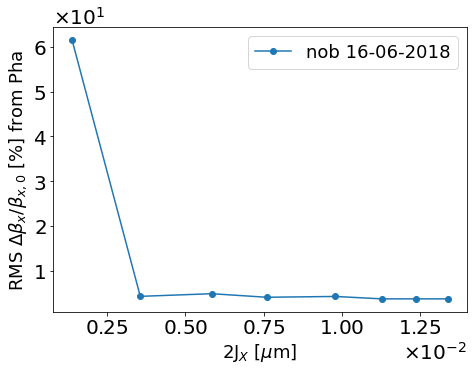

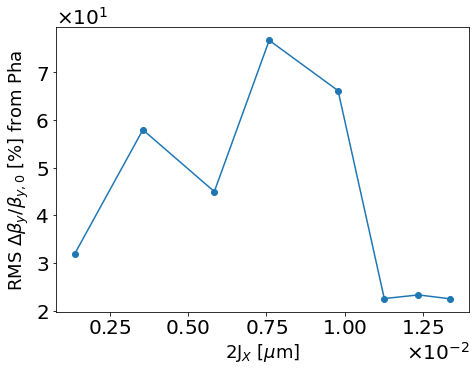

In [8]:
#  ABB in the Horizontal plan
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(7, 5))


for l in list_Case:
    plot_data_vs_2J(ax,pd.DataFrame(l["BETX(2J"+axis_data+")"].std()).T   ,label=l["NAME"],ls="o-")
ax.legend();
#ax.set_ylim(-.002,.002);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"RMS $\Delta\beta_x/\beta_{x,0}$ [%] from Pha");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.95, bottom=.16)

if flg_save:
    fig.savefig(pth_save+'RMS-AmplitudeBetaBeating(PHA)X_2J'+axis_data+'.pdf')
plt.show()




#  ABB in the Vertical plan
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(7, 5))


for l in list_Case:
    plot_data_vs_2J(ax,pd.DataFrame(l["BETY(2J"+axis_data+")"].std()).T   ,label=l["NAME"],ls="o-")
#ax.legend();
#ax.set_ylim(-.002,.002);
ax.set_xlabel(r"2J$_"+axis_data+r"$ [$\mu$m]");
ax.set_ylabel(r"RMS $\Delta\beta_y/\beta_{y,0}$ [%] from Pha");
ax.ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

#fig, plt.subplots_adjust(left=.22, right=.95, top=.95, bottom=.06)
fig, plt.subplots_adjust(left=.15, right=.97, top=.95, bottom=.16)

if flg_save:
    fig.savefig(pth_save+'RMS-AmplitudeBetaBeating(PHA)Y_2J'+axis_data+'.pdf')
plt.show()

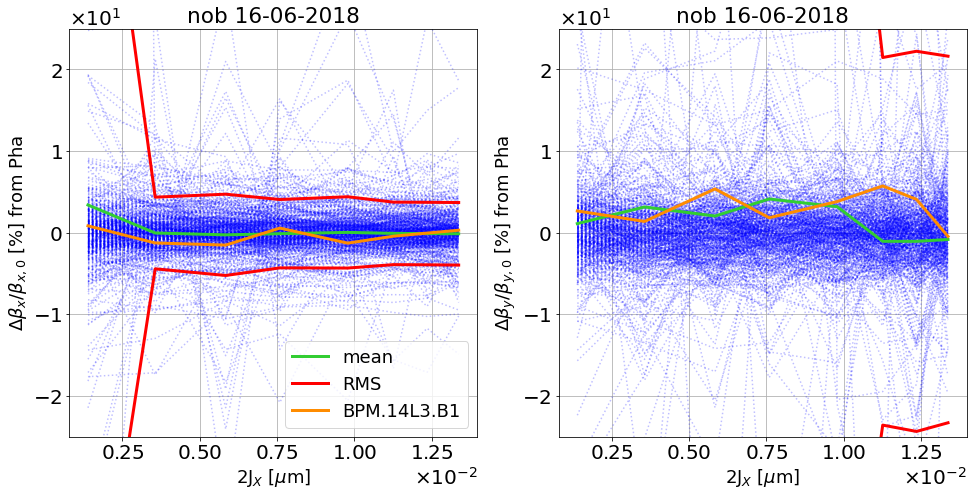

In [9]:
#name_BPM=''              # don't show particular BPM
name_BPM='BPM.14L3.B1'   # add Betabeating line in orange for this BPM
for n in range(n_Case):
    l=list_Case[n]
    fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(14, 7))


    plot_stat_vs_2J(ax[0],l["BETX(2J"+axis_data+")"],alpha_D=.25)
    ax[0].legend();
    ax[0].grid();
    ax[0].set_ylim(-25,25);
    ax[0].set_xlabel(r"2J$_"+axis_data+"$ [$\mu$m]");
    ax[0].set_ylabel(r"$\Delta\beta_x$/$\beta_{x,0}$ [%] from Pha");
    ax[0].set_title(l["NAME"]);
    ax[0].ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)


    plot_stat_vs_2J(ax[1],l["BETY(2J"+axis_data+")"],alpha_D=.25)
    #ax[1].legend();
    ax[1].grid();
    ax[1].set_ylim(-25,25);
    ax[1].set_xlabel(r"2J$_"+axis_data+"$ [$\mu$m]");
    ax[1].set_ylabel(r"$\Delta\beta_y$/$\beta_{y,0}$ [%] from Pha");
    ax[1].set_title(l["NAME"]);
    ax[1].ticklabel_format(style='sci',axis='both', scilimits=(0,0),useMathText = True)

    if name_BPM:
        col = l["BETX(2J"+axis_data+")"].columns.tolist(); col.sort()
        Data=pd.DataFrame(l["BETX(2J"+axis_data+")"].loc[name_BPM,:]).T;  #print(Data)
        tp=pd.DataFrame(columns=col)
        for c in col:
            tp[c]=Data[c]
        for t in tp.iterrows():
            tmp=pd.DataFrame(t[1])
            #print(tmp)
            ax[0].plot(tmp.index.tolist(),tmp[tmp.columns.values].values,'-',color='darkorange',label=tmp.columns.values[0], linewidth=3)
            ax[0].legend()


        Data=pd.DataFrame(l["BETY(2J"+axis_data+")"].loc[name_BPM,:]).T;  #print(Data)
        col = Data.columns.tolist(); col.sort()
        tp=pd.DataFrame(columns=col)
        for c in col:
            tp[c]=Data[c]
        for t in tp.iterrows():
            tmp=pd.DataFrame(t[1])
            #print(tmp)
            ax[1].plot(tmp.index.tolist(),tmp[tmp.columns.values].values,'-',color='darkorange',label=tmp.columns.values[0], linewidth=3)


    
    fig, plt.subplots_adjust(left=.08, right=.97, top=.93, bottom=.12)


    if flg_save:
        if name_BPM:
            fig.savefig(pth_save+f'Projection_BetaBeating(PHA)_vs_2J'+axis_data+f'-c{n}-bpm{name_BPM}.pdf')
        else:
            fig.savefig(pth_save+f'Projection_BetaBeating(PHA)_vs_2J'+axis_data+f'-c{n}.pdf')
    plt.show()

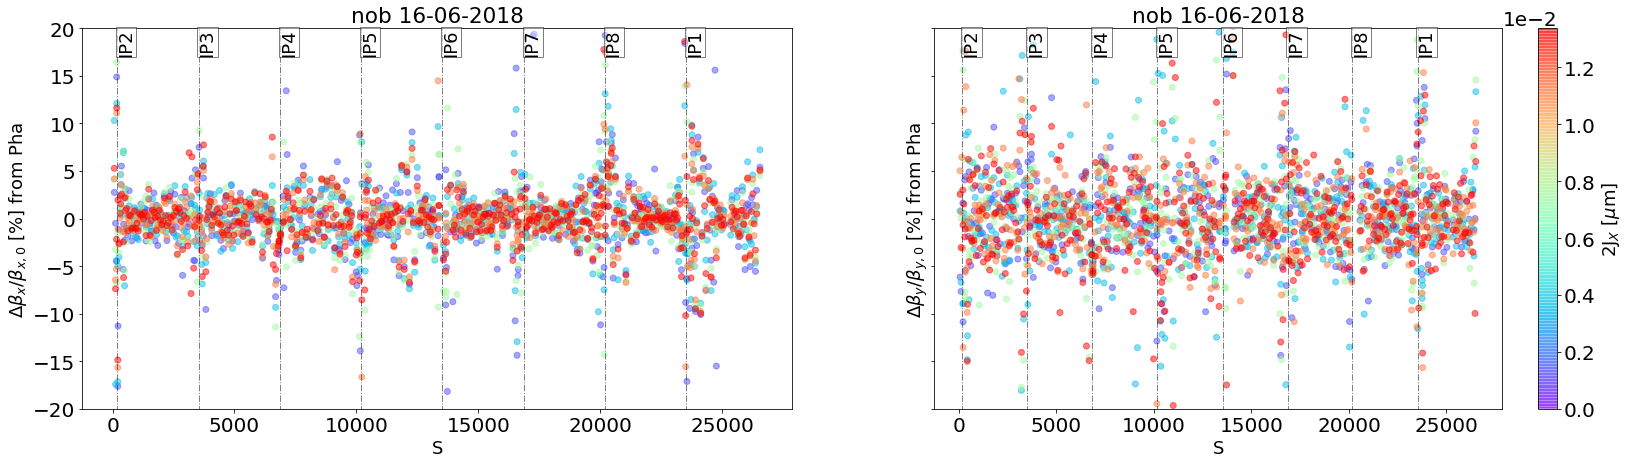

In [10]:
vylim=[-20,20]
cm = plt.cm.get_cmap('rainbow')  # RdYlBu, ocean, winter,  viridis, inferno, magma
n2J=5                           # Number of point in amplitude (0:all)
mmin2J=0                        # 0: none, 1: minus Initial beta-beating, 2: minus finale beta-beating



for n in range(n_Case):
    l=list_Case[n]
    
    fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(28, 7), sharex=True, sharey=True)

    sc=plot_data_vs_Sand2J(ax[0],l["BETX(2J"+axis_data+")"],l["S"],l["struct"],ylim=vylim,ls='o',alpha=.5,cm=cm,n2J=n2J,mmin2J=mmin2J)
    #ax[0].legend();
    ax[0].set_ylim(vylim[0],vylim[1]);
    ax[0].set_xlabel(r"S");
    ax[0].set_ylabel(r"$\Delta\beta_x$/$\beta_{x,0}$ [%] from Pha");
    ax[0].set_title(l["NAME"]);


    sc=plot_data_vs_Sand2J(ax[1],l["BETY(2J"+axis_data+")"],l["S"],l["struct"],ylim=vylim,ls='o',alpha=.5,cm=cm,n2J=n2J,mmin2J=mmin2J)
    #ax[1].legend();
    ax[1].set_ylim(vylim[0],vylim[1]);
    ax[1].set_xlabel(r"S");
    ax[1].set_ylabel(r"$\Delta\beta_y$/$\beta_{y,0}$ [%] from Pha");
    ax[1].set_title(l["NAME"]);

    cbar=fig.colorbar(sc,ax=ax[1]);#, orientation="horizontal");
    cbar.formatter.set_powerlimits((0, 0))
    cbar.set_label(r"2J$_"+axis_data+r"$ [$\mu$m]");

    if flg_save:
        if mmin2J==2:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-all-cor_BB_max_amp.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-n2J={n2J}-cor_BB_max_amp.pdf')
        elif mmin2J==1:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-all-cor_BB_min_amp.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-n2J={n2J}-cor_BB_min_amp.pdf')
        else:
            if n2J==0:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-all.pdf')
            else:
                fig.savefig(pth_save+f'Local_BetaBeating(PHA)_vs_2J'+axis_data+f'-n2J={n2J}.pdf')
    plt.show()